In [53]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.shape

(891, 12)

In [57]:
 df=df.drop(columns="PassengerId")

In [58]:
df=df.drop_duplicates()

In [59]:
df.shape

(891, 11)

In [60]:
df.isnull().sum()
#null present so we need to fill it

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [61]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [62]:
#fill all null value by most frequent component

In [63]:
df["Embarked"]=df["Embarked"].fillna("S")

In [64]:
#check for null values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [65]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [66]:

#drop column name that is not contrbuting more on dataset

In [67]:
df=df.drop(columns=["Ticket","Name","Cabin"])

In [68]:
#converting all categorical values to integers or machine understandable language

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [69]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [70]:
#no duplicate records present i removed id it will not affect output
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<AxesSubplot:>

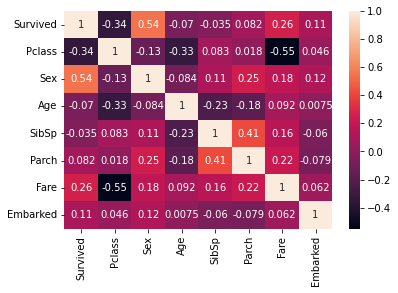

In [71]:
sns.heatmap(df.corr(),annot=True)
#from heatmap it clearly says that only sex is having higher corelation with output and no co relation value 
#greater then .75 so no multicolinearity exist

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


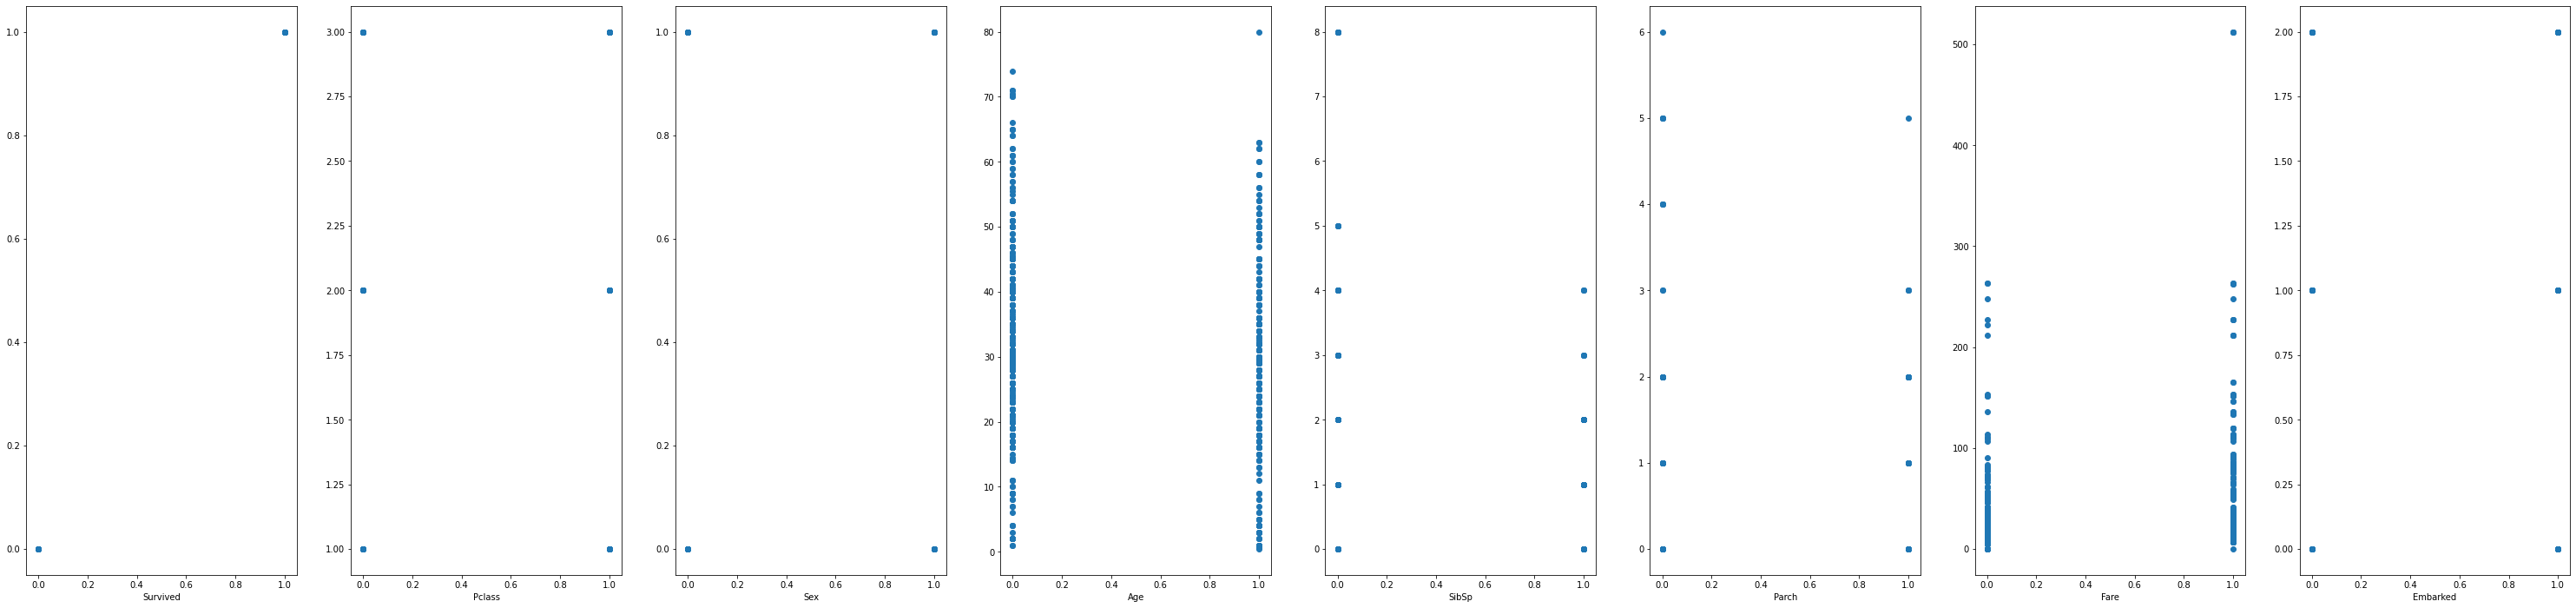

In [73]:
columnlen=df.columns.values
plt.figure(figsize=(200,200))
for i in range(0,len(columnlen)):
  plt.subplot(14,30,i+1)
  plt.scatter(x=list(df["Survived"]),y=list(df[columnlen[i]]),data=df)
  plt.xlabel(columnlen[i])  

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


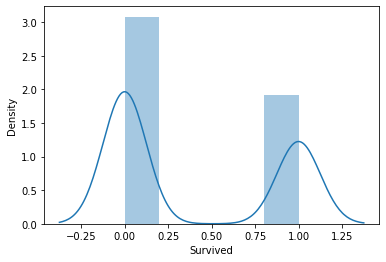

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


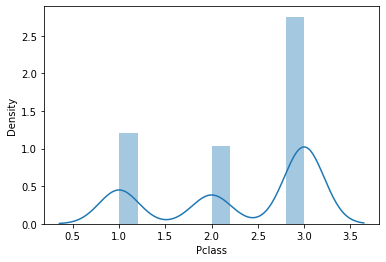

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


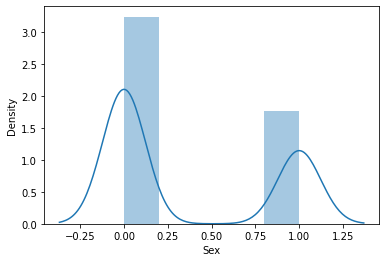

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


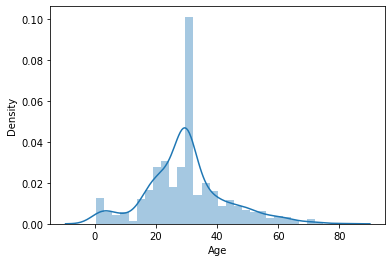

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


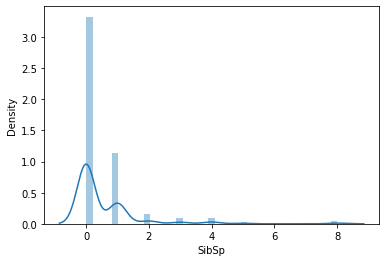

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


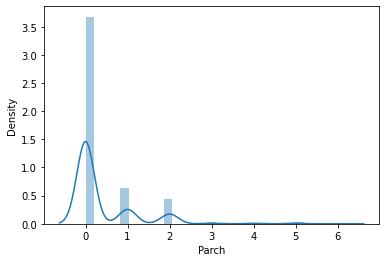

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


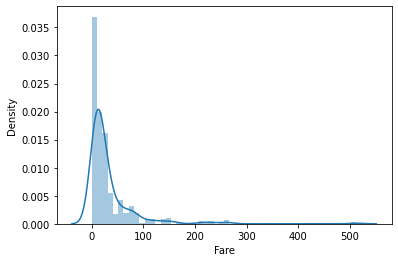

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


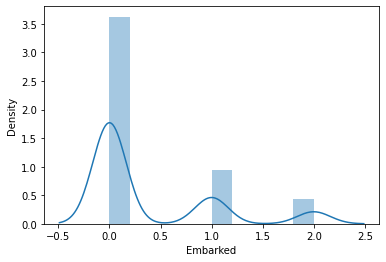

In [74]:
for i in df.columns:
    sns.distplot(df[i])
  
    plt.show()
#the curve is not normalised   

In [75]:
df.Survived.value_counts()
#since it has only two value it is a classification problem

0    549
1    342
Name: Survived, dtype: int64

In [76]:
#checking skewness
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [77]:
from scipy import stats

In [78]:
df["SibSp"]=stats.yeojohnson(df["SibSp"])[0]
df["Parch"]=stats.yeojohnson(df["SibSp"])[0]
df["Fare"]=stats.yeojohnson(df["SibSp"])[0]
df["Embarked"]=stats.yeojohnson(df["SibSp"])[0]


In [79]:
#To check snewness again
#snewness removed
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       0.808608
Parch       0.785669
Fare        0.785669
Embarked    0.785669
dtype: float64

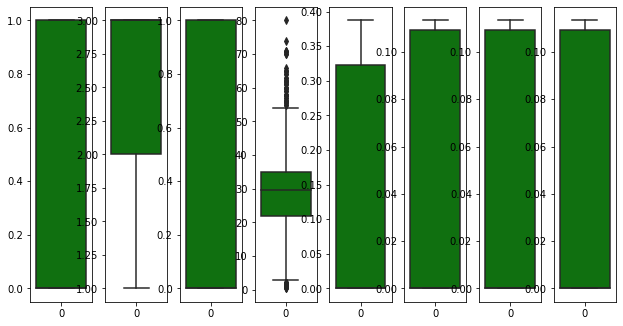

In [80]:
#check for outliers
columnlen=df.columns.values
plt.figure(figsize=(40,90))
for i in range(0,len(columnlen)):
  plt.subplot(14,30,i+1)
  sns.boxplot(data=df[columnlen[i]],orient="v",color="green")

In [81]:
#remove ouliers.i can see ouliers for age . i take if age is more then 90 are outliers
outliers=df[df["Age"]>90]
outliers
#no outliers are present


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [82]:
#standarise
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=df.drop(columns="Survived")
y=df["Survived"]
x=sc.fit_transform(x)

In [83]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.20,)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [84]:
score

0.8324022346368715

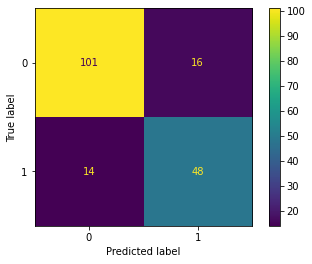

In [85]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()
    
    
    

In [86]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [87]:
#Decision Tree

In [88]:
score

0.8324022346368715

In [89]:
clf=DecisionTreeClassifier()
grid_parameter={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,10),
    "min_samples_split":range(3,10),
    "max_leaf_nodes":range(2,4)
}

In [90]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_parameter,cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [91]:
best_paramter=grid_search.best_params_
print(best_paramter)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [92]:
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 2, min_samples_leaf= 2, min_samples_split= 4)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8324022346368715

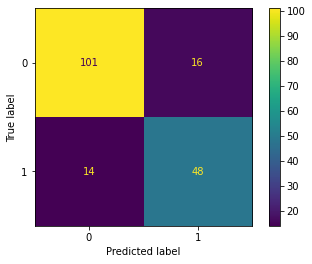

In [93]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [94]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_model=SVC()
params = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

print(svcClf.best_params_)
print(svcClf.best_score_)

{'C': 1, 'gamma': 1}
0.8033255086071988


In [96]:
svc_model=SVC()
params = {'C':[1] , 'gamma': [0.1]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': [1], 'gamma': [0.1]},
             scoring='accuracy')

In [97]:
y_pred=svcClf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8491620111731844

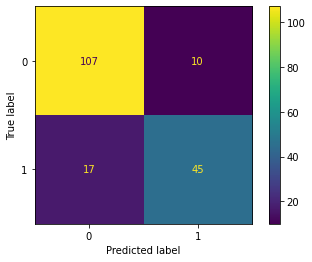

In [98]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [99]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       117
           1       0.82      0.73      0.77        62

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



In [147]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
#
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf.fit(x_train, y_train)


RandomForestClassifier()

In [151]:

print(rf_random.best_params_)

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

In [ ]:
random_grid={'n_estimators':5,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}
rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(x_train,y_train)
y_pred=rf_random.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [104]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8491620111731844

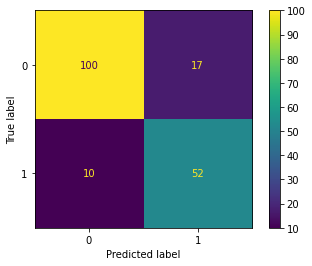

In [105]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [106]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       117
           1       0.75      0.84      0.79        62

    accuracy                           0.85       179
   macro avg       0.83      0.85      0.84       179
weighted avg       0.86      0.85      0.85       179



/home/revathy/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/revathy/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/revathy/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 

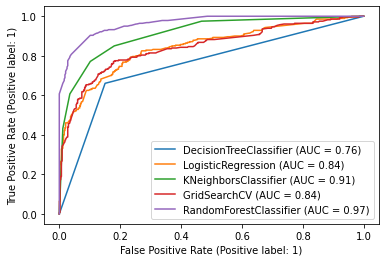

In [107]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(clf,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(kn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svcClf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)

/home/revathy/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/revathy/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/revathy/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 

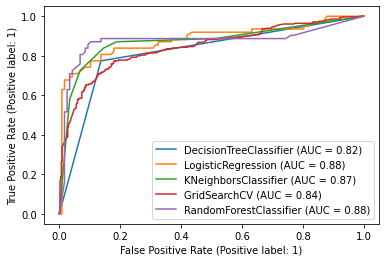

In [110]:
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

In [111]:
#since test sccuracy and train accuracy is same for gridserach cv. it is a best model
import pickle
filename="Survive"
pickle.dump(svcClf,open(filename,"wb"))